# Imports

In [2]:
# common io modules
import os, glob

# mandatory data science modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# p8-core and style
import p8
from p8.plot import style, correlations, descriptive, ml
style.set_default()

# Analysis


In [12]:
datasets = sorted(glob.glob('./data/df_players_*.pkl'))

#### GD for some years isn't correct. Check this!

In [13]:
for dataset in datasets:
    print(dataset)
    df = pd.read_pickle(dataset)
    value_counts = df.goal_difference.value_counts()
    if len(value_counts) == 0:
        print(value_counts)

./data/df_players_Bundesliga_2014-15.pkl
Series([], Name: goal_difference, dtype: int64)
./data/df_players_Bundesliga_2015-16.pkl
Series([], Name: goal_difference, dtype: int64)
./data/df_players_Bundesliga_2016-17.pkl
./data/df_players_Bundesliga_2017-18.pkl
./data/df_players_Bundesliga_2018-19.pkl
./data/df_players_LaLiga_2014-15.pkl
./data/df_players_LaLiga_2015-16.pkl
Series([], Name: goal_difference, dtype: int64)
./data/df_players_LaLiga_2016-17.pkl
./data/df_players_LaLiga_2017-18.pkl
./data/df_players_LaLiga_2018-19.pkl
./data/df_players_PremierLeague_2014-15.pkl
./data/df_players_PremierLeague_2015-16.pkl
./data/df_players_PremierLeague_2016-17.pkl
./data/df_players_PremierLeague_2017-18.pkl
./data/df_players_PremierLeague_2018-19.pkl
./data/df_players_SerieA_2014-15.pkl
./data/df_players_SerieA_2015-16.pkl
./data/df_players_SerieA_2016-17.pkl
./data/df_players_SerieA_2017-18.pkl
Series([], Name: goal_difference, dtype: int64)
./data/df_players_SerieA_2018-19.pkl
./data/df_pla

#### Get Data

In [27]:
def get_league_dataset(league):
    files = glob.glob(f'./data/*_{league}_*.pkl')
    dataset = pd.concat([pd.read_pickle(file) for file in files])
    return dataset

### Check double occurences of players over teams and years
* Somehow give them an ID

In [28]:
df_bundesliga = get_league_dataset('Bundesliga')

In [48]:
player_occurences = df_bundesliga.groupby(['url', 'matchday', 'year'])['competition'].count()

In [58]:
df_players = df_bundesliga[df_bundesliga['year'] == '2018-19'].copy()

#### First analysis with single dataset

In [59]:
df_players['gd_per_minute'] = df_players['goal_difference'] / df_players['duration']

df_grouped = df_players.groupby(['team', 'name'])['goal_difference', 'duration', 'gd_per_minute'].sum()
df_grouped['gd_per_minute_new'] = df_grouped['goal_difference'] / df_grouped['duration']
df_grouped['games_played'] = df_grouped['duration'] / 90

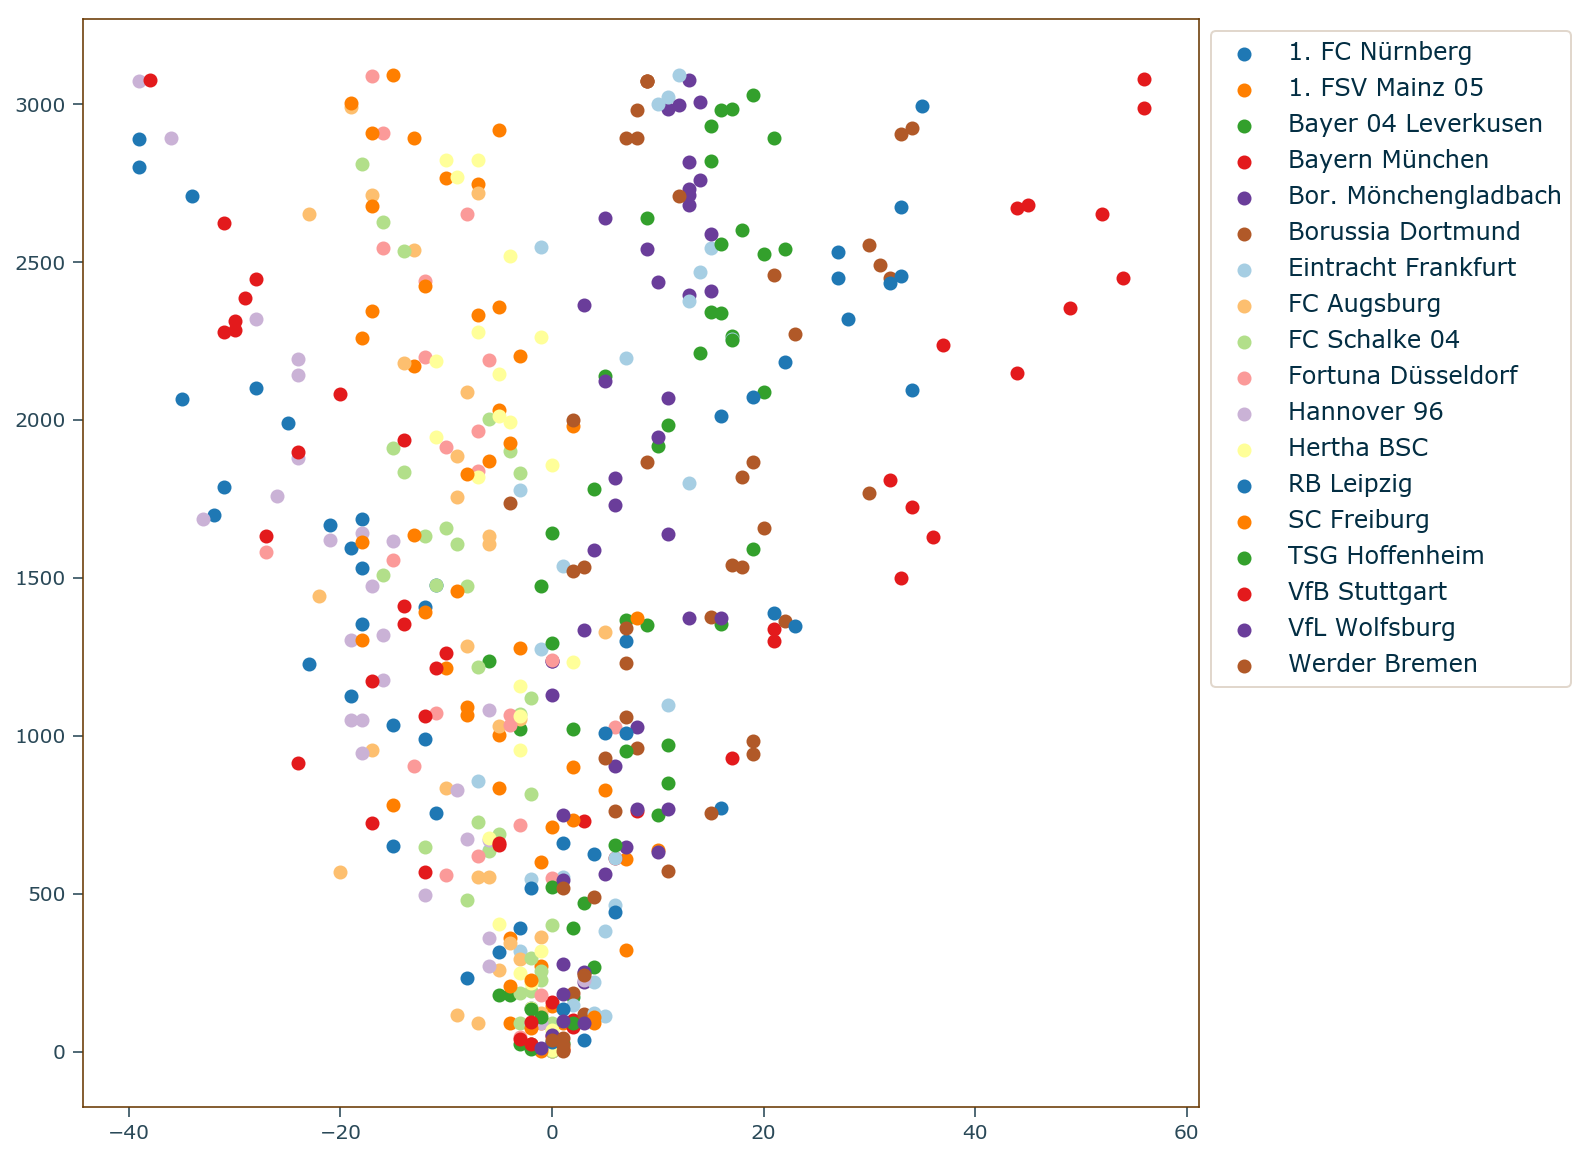

In [60]:
plt.figure(figsize=(10, 10))
for team in df_grouped.index.get_level_values(0).unique():
    df_team = df_grouped[df_grouped.index.get_level_values(0) == team]
    plt.scatter(df_team['goal_difference'], df_team['duration'], label=team)

plt.legend(bbox_to_anchor=(1.0, 1.0))

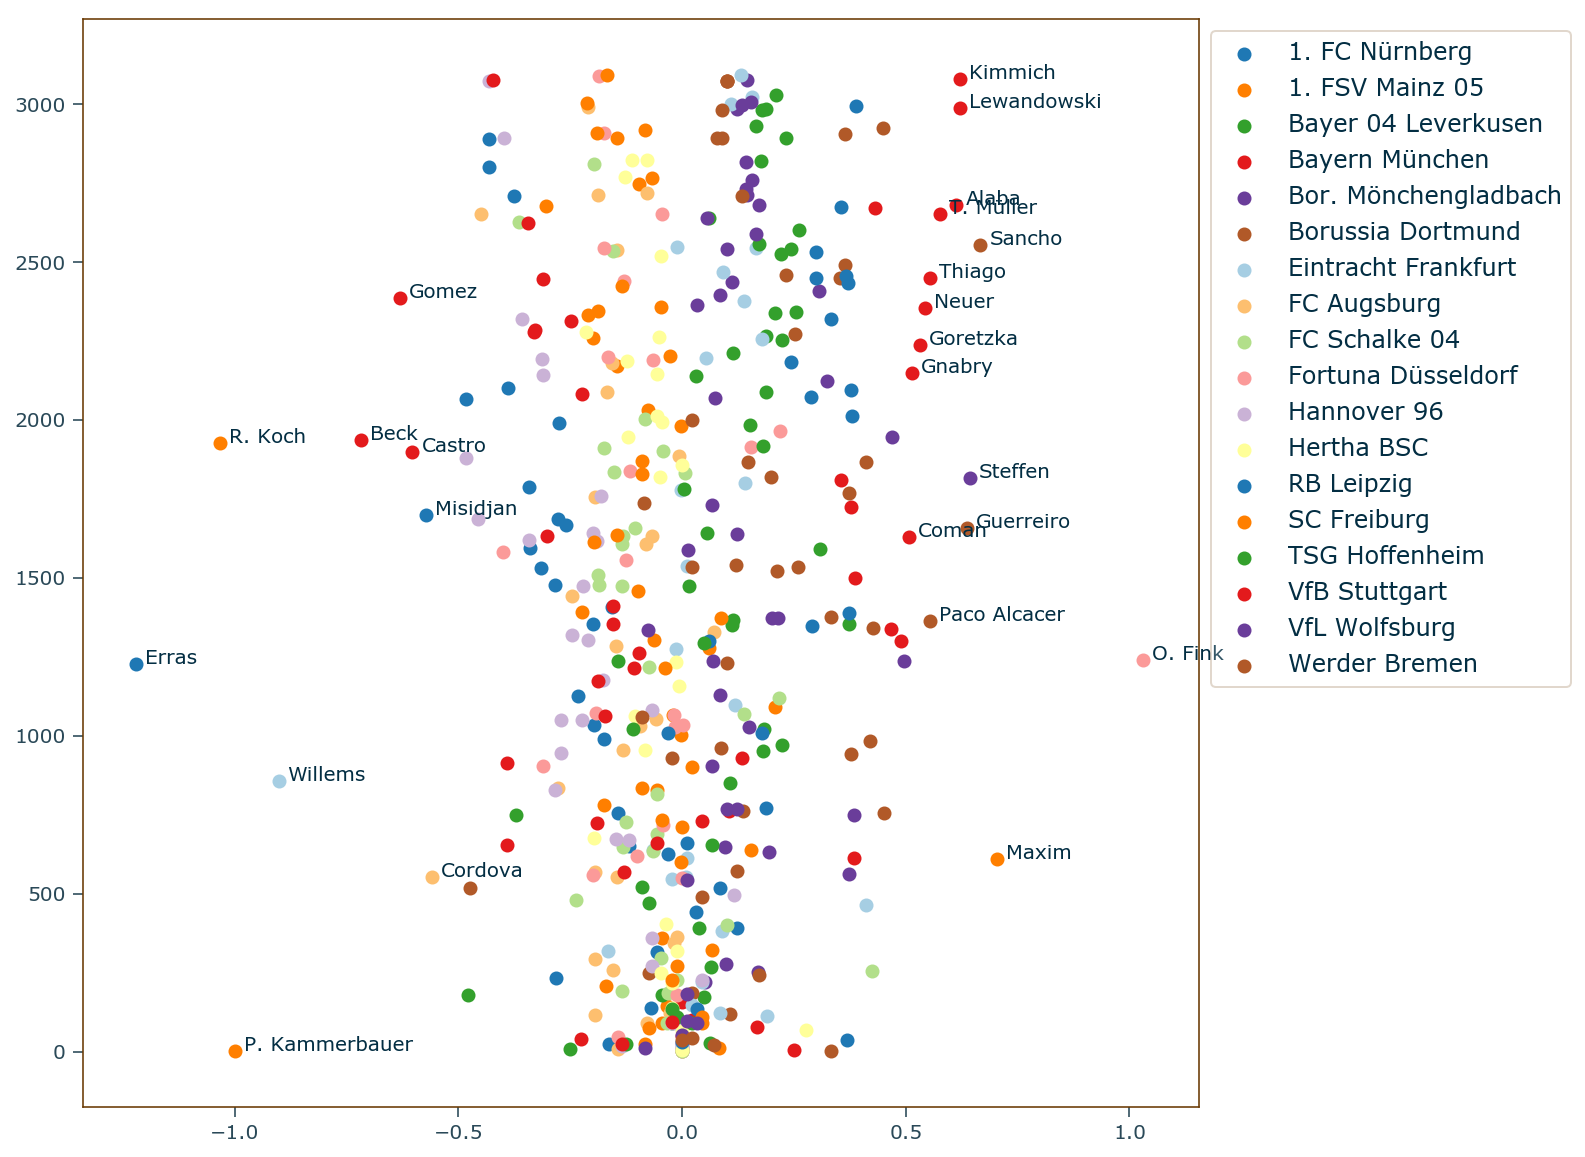

In [61]:
plt.figure(figsize=(10, 10))
for team in df_grouped.index.get_level_values(0).unique():
    df_team = df_grouped[df_grouped.index.get_level_values(0) == team]
    plt.scatter(df_team['gd_per_minute'], df_team['duration'], label=team)

for (team, name), values in df_grouped[df_grouped['gd_per_minute'].abs() > 0.5][['gd_per_minute', 'duration']].iterrows():
    plt.annotate(name, xy=values+0.02)
    
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
df_team = df_grouped[df_grouped.index.get_level_values(0) == team]
plt.scatter(df_team[column], df_team['games_played'], label=team)
for (team, name), values in df_team[[column, 'games_played']].iterrows():
    plt.annotate(name, xy=values+0.02)
plt.show()

df_sorted = df_team.sort_values(column)
games_played = df_sorted['games_played']

plt.figure(figsize=(8, 8))
plt.barh(y=df_sorted.index.get_level_values(1), width=df_sorted[column], height=0.2 + 0.6*((games_played / 34)))
ax = plt.gca()
ax2 = plt.twiny()
xmin, xmax = ax.get_xlim()
negative_percentage = abs(xmin / (xmax - xmin))

#ax2.barh(y=df_sorted.index.get_level_values(1), width=, color='red', alpha=0.2)

xmin2, xmax2 = ax2.get_xlim()
ax2.set_xlim(-negative_percentage * (xmax2 - xmin2), xmax2)

In [ ]:
df_grouped[df_grouped['duration'] > 900].sort_values('gd_per_minute', ascending=False)